In [1]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed_all_params.h5ad')

In [3]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

In [4]:
# df = adata.var[["cast_kon", "cast_koff", "cast_ksyn"]]
# df = adata.var[["c57_kon", "c57_koff", "c57_ksyn"]]
# df = adata.var[["total_kon", "total_koff", "total_ksyn"]]
# df = adata.var[["spliced_kon", "spliced_koff", "spliced_ksyn"]]
# df = adata.var[["unspliced_kon", "unspliced_koff", "unspliced_ksyn"]]
df = adata.var[["total_s_u_kon", "total_s_u_koff", "total_s_u_ksyn"]]




df

,total_s_u_kon,total_s_u_koff,total_s_u_ksyn
Gene,,,
Mrpl15,2.176995,12.495542,2190.929841
4732440D04Rik,0.049667,4.569173,80.359250
Cops5,3.656598,29.409660,11898.416600
Arfgef1,1.756567,184.983916,22803.915975
Tram1,0.001000,8.264970,1.000000
...,...,...,...
Exosc7,1.229338,6.279444,1772.273585
Lars2,0.912919,18.076687,1391.569082
Sacm1l,NaN,NaN,NaN


In [5]:
# df.rename(columns={'cast_kon':'kon', 'cast_koff':'koff', 'cast_ksyn': 'ksyn'}, inplace=True)
# df.rename(columns={'c57_kon':'kon', 'c57_koff':'koff', 'c57_ksyn': 'ksyn'}, inplace=True)
# df.rename(columns={'total_kon':'kon', 'total_koff':'koff', 'total_ksyn': 'ksyn'}, inplace=True)
# df.rename(columns={'spliced_kon':'kon', 'spliced_koff':'koff', 'spliced_ksyn': 'ksyn'}, inplace=True)
# df.rename(columns={'unspliced_kon':'kon', 'unspliced_koff':'koff', 'unspliced_ksyn': 'ksyn'}, inplace=True)
df.rename(columns={'total_s_u_kon':'kon', 'total_s_u_koff':'koff', 'total_s_u_ksyn': 'ksyn'}, inplace=True)





df

C:\Users\shrr\AppData\Local\Temp\ipykernel_15448\367454731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'total_s_u_kon':'kon', 'total_s_u_koff':'koff', 'total_s_u_ksyn': 'ksyn'}, inplace=True)


,kon,koff,ksyn
Gene,,,
Mrpl15,2.176995,12.495542,2190.929841
4732440D04Rik,0.049667,4.569173,80.359250
Cops5,3.656598,29.409660,11898.416600
Arfgef1,1.756567,184.983916,22803.915975
Tram1,0.001000,8.264970,1.000000
...,...,...,...
Exosc7,1.229338,6.279444,1772.273585
Lars2,0.912919,18.076687,1391.569082
Sacm1l,NaN,NaN,NaN


In [6]:
df["bs"] = df["ksyn"] / df["koff"]
df

C:\Users\shrr\AppData\Local\Temp\ipykernel_15448\1504866622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bs"] = df["ksyn"] / df["koff"]


,kon,koff,ksyn,bs
Gene,,,,
Mrpl15,2.176995,12.495542,2190.929841,175.336918
4732440D04Rik,0.049667,4.569173,80.359250,17.587262
Cops5,3.656598,29.409660,11898.416600,404.575118
Arfgef1,1.756567,184.983916,22803.915975,123.275128
Tram1,0.001000,8.264970,1.000000,0.120993
...,...,...,...,...
Exosc7,1.229338,6.279444,1772.273585,282.234177
Lars2,0.912919,18.076687,1391.569082,76.981421
Sacm1l,NaN,NaN,NaN,NaN


In [7]:
df["bf"] = df["kon"]
df

C:\Users\shrr\AppData\Local\Temp\ipykernel_15448\28527758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bf"] = df["kon"]


,kon,koff,ksyn,bs,bf
Gene,,,,,
Mrpl15,2.176995,12.495542,2190.929841,175.336918,2.176995
4732440D04Rik,0.049667,4.569173,80.359250,17.587262,0.049667
Cops5,3.656598,29.409660,11898.416600,404.575118,3.656598
Arfgef1,1.756567,184.983916,22803.915975,123.275128,1.756567
Tram1,0.001000,8.264970,1.000000,0.120993,0.001000
...,...,...,...,...,...
Exosc7,1.229338,6.279444,1772.273585,282.234177,1.229338
Lars2,0.912919,18.076687,1391.569082,76.981421,0.912919
Sacm1l,NaN,NaN,NaN,NaN,NaN


In [8]:
df["me"] = df["kon"] / (df["kon"] + df["koff"])
df

C:\Users\shrr\AppData\Local\Temp\ipykernel_15448\3067333347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["me"] = df["kon"] / (df["kon"] + df["koff"])


,kon,koff,ksyn,bs,bf,me
Gene,,,,,,
Mrpl15,2.176995,12.495542,2190.929841,175.336918,2.176995,0.148372
4732440D04Rik,0.049667,4.569173,80.359250,17.587262,0.049667,0.010753
Cops5,3.656598,29.409660,11898.416600,404.575118,3.656598,0.110584
Arfgef1,1.756567,184.983916,22803.915975,123.275128,1.756567,0.009406
Tram1,0.001000,8.264970,1.000000,0.120993,0.001000,0.000121
...,...,...,...,...,...,...
Exosc7,1.229338,6.279444,1772.273585,282.234177,1.229338,0.163720
Lars2,0.912919,18.076687,1391.569082,76.981421,0.912919,0.048075
Sacm1l,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import matplotlib.colors as colors
# plt.scatter(
#     np.log10(df["bs"]), 
#     np.log10(df["bf"]), 
#     s=5, 
#     c=df["me"], 
#     cmap='magma_r', 
#     norm=colors.LogNorm(vmin=min(df["me"]), vmax=max(df["me"]))
# )
# plt.colorbar()
# plt.xlabel('Burst size')
# plt.ylabel('Burst frequency')
# plt.savefig('figures/ExtDataFig3f/ExtDataFig3f_total.pdf')
# plt.show()

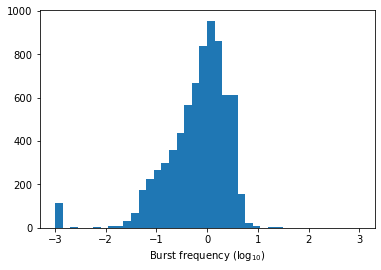

In [10]:
plt.hist(np.log10(df["bf"]), bins=40)
plt.xlabel(r'Burst frequency (log$_{10}$)')
plt.savefig('figures/Fig1c/Fig1c_total.pdf')
plt.show()

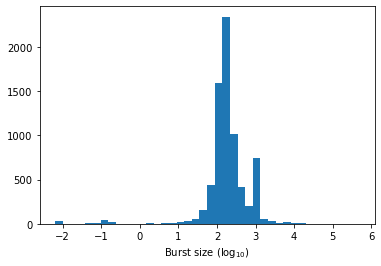

In [11]:
plt.hist(np.log10(df["bs"]), bins=40)
plt.xlabel(r'Burst size (log$_{10}$)')
plt.savefig('figures/Fig1d/Fig1d_total.pdf')
plt.show()

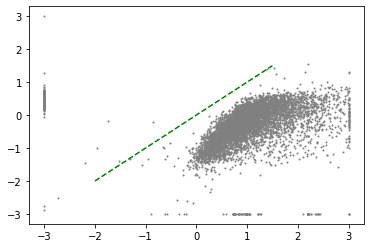

In [12]:
plt.plot(np.arange(-2,2,0.5),np.arange(-2,2,0.5), 'g--')
plt.scatter(np.log10(df["koff"]), np.log10(df["bf"]), s=1, c='grey')
plt.savefig('figures/Fig1g/Fig1g_total.pdf')
plt.show()